In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
# To avoid clutter in the output, suppress warnings
warnings.filterwarnings('ignore')

In [149]:
sns.set_style('whitegrid', {"grid.color": "#E2E0E0FF", "grid.linestyle": "--"})
# todo: set style
# set default fig size here
# use (10, 6) for general & use (15, 5) for wider horizontal graphs

In [4]:
# todo: add helpers here (maybe library or inplace classes)

In [5]:
df = pd.read_csv('foodhub_order.csv')
original_df = df.copy()

In [6]:
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [7]:
df.sample(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1846,1478154,383688,CafÌ© China,Chinese,12.61,Weekend,5,20,20
447,1477558,268365,Cafe Mogador,Middle Eastern,25.17,Weekend,4,23,30
1210,1478427,86806,Pylos,Mediterranean,14.12,Weekday,4,26,24
1336,1476823,60039,Blue Ribbon Sushi,Japanese,12.13,Weekday,Not given,32,29
210,1478343,231042,Momoya,Japanese,8.54,Weekday,4,28,29


In [8]:
# help me write observations for above data frame
# Observations:
# 1. The dataset contains information about food orders from various restaurants.
# 2. There are 9 columns in the dataset: order_id, customer_id, restaurant_name, cuisine_type, cost_of_the_order, day_of_the_week, rating, food_preparation_time, and delivery_time.
# 3. The first 5 rows show orders from different restaurants with varying cuisine types such as Korean, Japanese, Mexican, and American.
# 5. The 'rating' column contains both numeric and non-numeric values (e.g., 'Not given').
# 6. The 'day_of_the_week' column indicates whether the order was placed on a weekday or weekend.
# 7. The 'food_preparation_time' and 'delivery_time' columns are measured in minutes.

In [10]:
# Q1. # rows and cols
# rows and cols in dataset
df.shape

(1898, 9)

In [11]:
# Observations:
# The dataset contains 1898 rows and 9 columns.
# rows corresponds to orders and columns corresponds to features of the order.

In [12]:
# Q2 what are he datatypes of different columns
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

In [ ]:
# Observations:
# 1. The 'order_id', 'customer_id', 'food_preparation_time', and 'delivery_time' columns are of type int64, indicating they contain integer values.
# 2. The 'cost_of_the_order' column is of type float64, indicating it contains floating-point numbers.
# 3. The 'restaurant_name', 'cuisine_type', 'day_of_the_week', and 'rating' columns are of type object, indicating they contain string values.

#NOTE: Though 'rating' column is of type object, it should be of type int64, as ratings are given generally in ordinal manner. We will fix this later.

In [17]:
# Q3 Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [23]:
# missing values
df.isnull().any().any()

False

In [ ]:
# Observations:
# There are no explicit missing values in the dataset.
# However, the rating column contains entries labeled as "Not given" which indicate the absence of a customer rating.
# These entries should be treated as missing values during analysis to ensure accurate insights into customer satisfaction.

In [19]:
# check statistcial summary for dataset
stat_summary  = df.describe(include='all')
stat_summary

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


In [ ]:
# Q4 Display the statistical summary of the dataset
stat_summary = df.describe()
print(stat_summary)

# Observations:
# 1. The dataset contains 1898 entries for each column.
# 2. The 'order_id', 'customer_id', 'food_preparation_time', and 'delivery_time' columns have integer values.
# 3. The 'cost_of_the_order' column has floating-point values.
# 4. The average cost of the orders is approximately 16.59 units.
# 5. The minimum cost of an order is 2.50 units, while the maximum cost is 35.00 units.
# 6. The average food preparation time is approximately 25.57 minutes.
# 7. The minimum food preparation time is 20 minutes, while the maximum is 35 minutes.
# 8. The average delivery time is approximately 22.43 minutes.
# 9. The minimum delivery time is 10 minutes, while the maximum is 40 minutes.

In [24]:
# Get the statistical summary for the 'food_preparation_time' column
food_preparation_summary = df['food_preparation_time'].describe()
food_preparation_summary

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [ ]:
# Q4 Display the statistical summary for the 'food_preparation_time' column
food_preparation_summary = df['food_preparation_time'].describe()
print(food_preparation_summary)

# Observations:
# 2. The average food preparation time is approximately 27.37 minutes.
# 3. The standard deviation is around 4.63 minutes, indicating some variability in preparation times.
# 4. The minimum food preparation time is 20 minutes.
# 5. The 25th percentile (Q1) is 23 minutes, meaning 25% of the orders have a preparation time of 23 minutes or less.
# 6. The median (50th percentile) food preparation time is 27 minutes.
# 7. The 75th percentile (Q3) is 31 minutes, meaning 25% of the orders have a preparation time of 31 minutes or more.
# 8. The maximum food preparation time is 35 minutes.

# *** IMPORTANT ***
# On average, restaurants take about 27 minutes to prepare food, with most orders falling between 23 and 31 minutes.
# While the fastest orders are ready in 20 minutes, some take up to 35 minutes.
# The slight variability in preparation time (around 4 minutes) suggests a consistent but slightly flexible pace across restaurants.

In [18]:
#Q5 how many orders are not rated ?
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
# Observation
# The rating column includes 736 orders marked as "Not given,"
# indicating that these orders were not rated by customers.
# Since there are no missing values in the column, these entries explicitly represent the absence of a rating.

In [25]:
# Let's convert the 'rating' column to a numeric type and replace 'Not given' with NaN for consistency.
# convert rating column to numeric type by replacing 'Not given' with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [26]:
# check type of rating column now
df['rating'].dtype

dtype('float64')

In [30]:
distinct_ratings = df['rating'].nunique()
distinct_ratings

3

In [31]:
df['rating'].value_counts()

5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

In [32]:
df['rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1898 entries, 0 to 1897
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
1162 non-null   float64
dtypes: float64(1)
memory usage: 15.0 KB


In [24]:
# Top 5 restaurants with the highest average rating
df.groupby('restaurant_name')['rating'].mean().nlargest(5)

restaurant_name
'wichcraft            5.0
67 Burger             5.0
Anjappar Chettinad    5.0
Asuka Sushi           5.0
Balade                5.0
Name: rating, dtype: float64

> order_id and customer_id are unique identifiers (ie nominal values) and don't provide meaningful insights, so we'll exclude them from the univariate analysis.

### Univairate Anaysis

In [34]:
# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (10, 6)

In [35]:
sns.set_theme(style='whitegrid')

In [36]:
# Count the occurrences of each restaurant
restaurant_demand = df['restaurant_name'].value_counts()

In [37]:
restaurant_demand

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [183]:
# function that converts snakeCase into PascalCase
def snake_to_pascal(snake_str):
    components = snake_str.split('_')
    return ' '.join(x.title() for x in components)

def draw_countplot(x, rot=0, name=None, o=None, sort=True):
    label = name if name else snake_to_pascal(x)
    priority = None
    if o:
        priority = o
    elif sort:
        # sort by count
        # NOTE: value_counts() returns a Series sorted by values (DESC) order by default
        priority = df[x].value_counts().index
    ax = sns.countplot(data=df, x=x, order=priority, palette='mako')
    # display count above each bar
    ax.bar_label(ax.containers[0])
    plt.title(f'Bar Graph {label}', fontsize=16)
    plt.xlabel(label, fontsize=12)
    plt.ylabel('count', fontsize=12)
    plt.xticks(rotation=rot)
    plt.show()

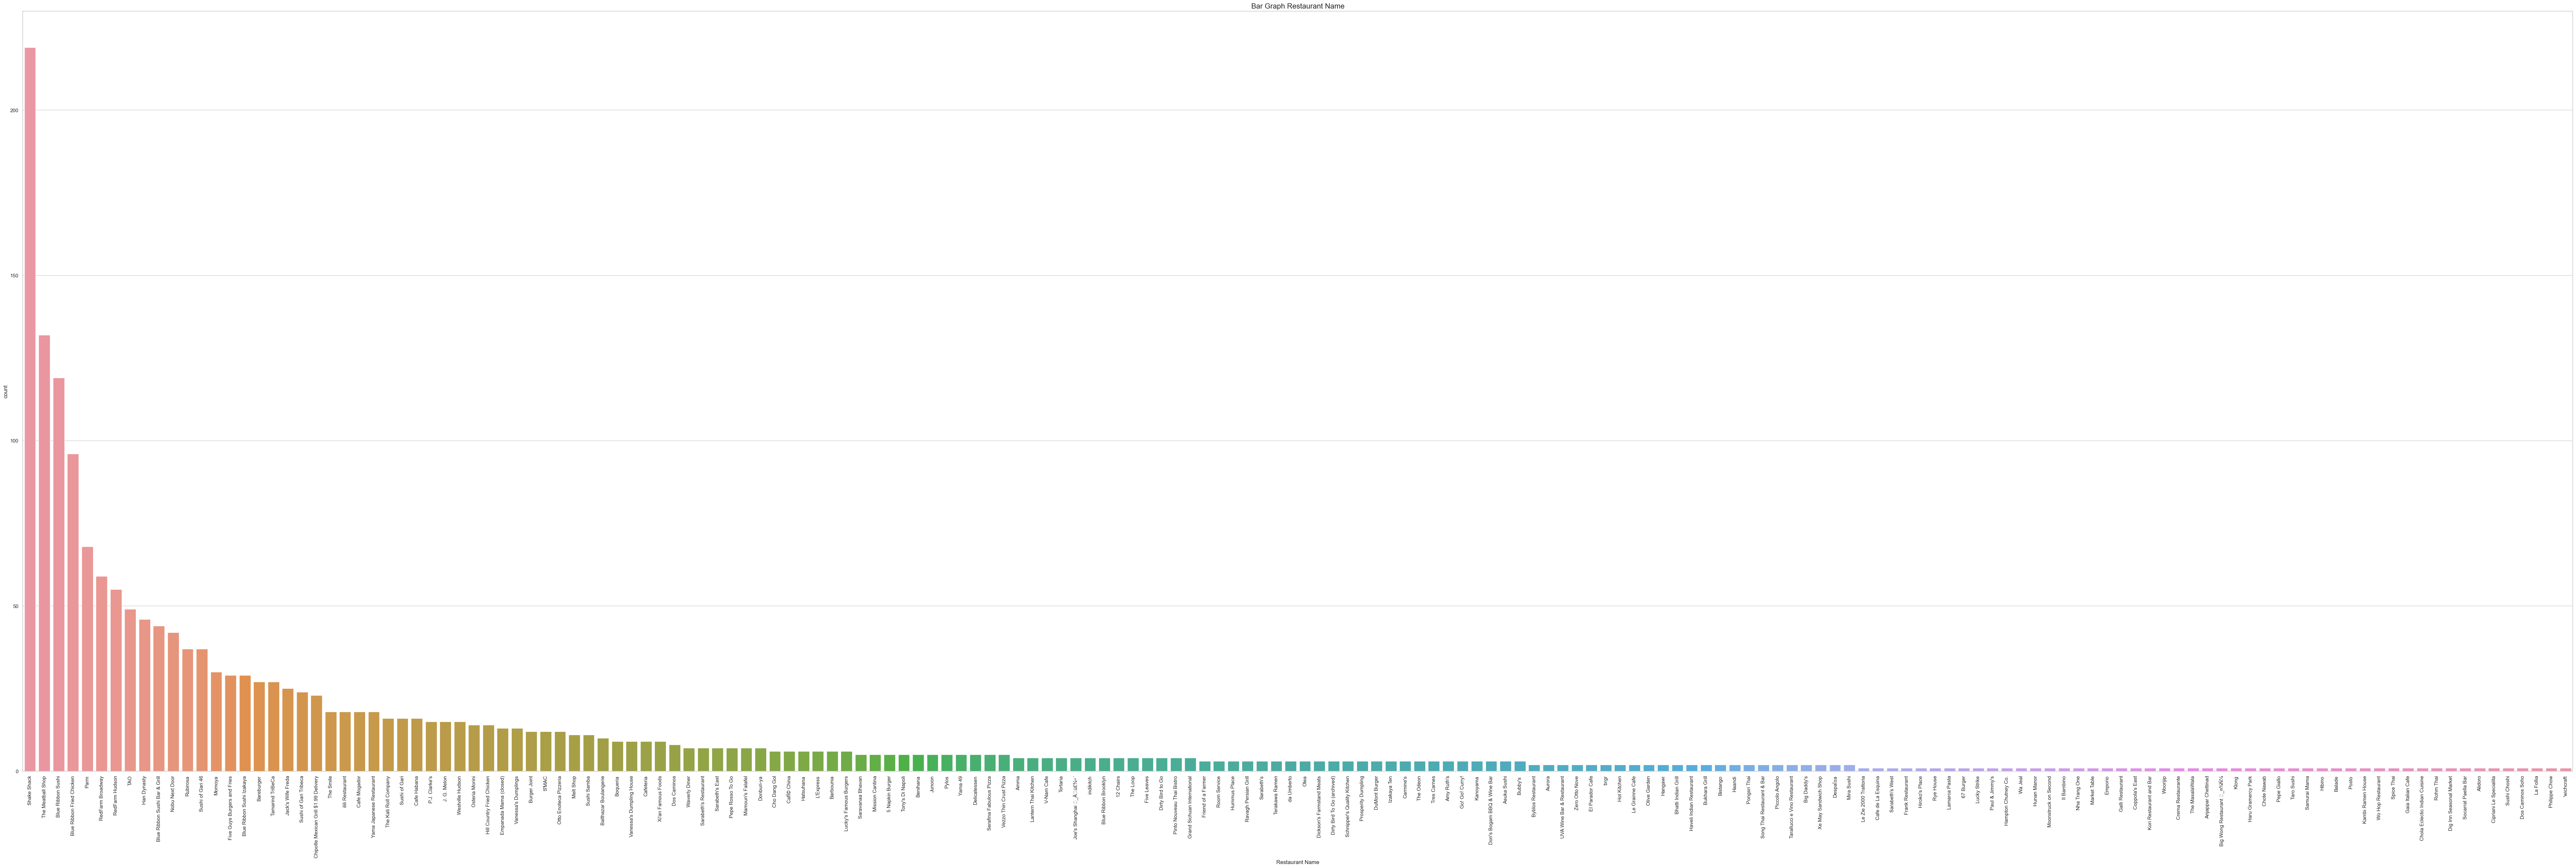

In [46]:
plt.figure(figsize=(100, 30))
# bargraph for catehorical variable 'restaurant_name' (string)
draw_countplot('restaurant_name', rot=90)

In [49]:
# As the restaurant_name is nominal data, here the unique values are a lot, so we can't get much insights from this graph.
# Hence let try to pick some priority restaurants and plot the graph again.

In [52]:
top_n = 10
top_restaurants = df['restaurant_name'].value_counts().nlargest(top_n).index
list(top_restaurants)

['Shake Shack',
 'The Meatball Shop',
 'Blue Ribbon Sushi',
 'Blue Ribbon Fried Chicken',
 'Parm',
 'RedFarm Broadway',
 'RedFarm Hudson',
 'TAO',
 'Han Dynasty',
 'Blue Ribbon Sushi Bar & Grill']

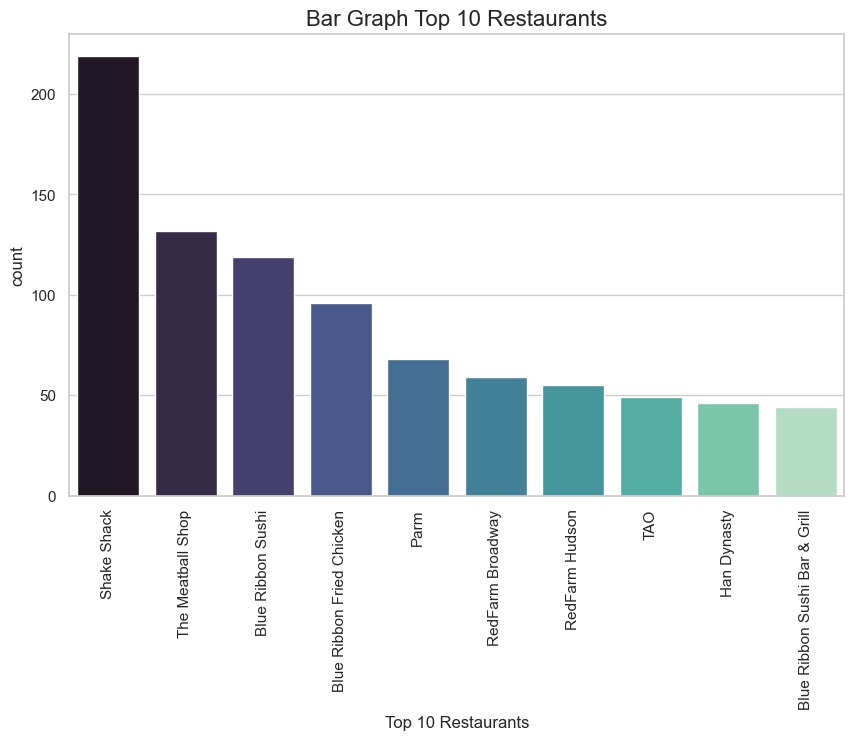

In [61]:
draw_countplot('restaurant_name', rot=90, name='Top 10 Restaurants', o=top_restaurants)

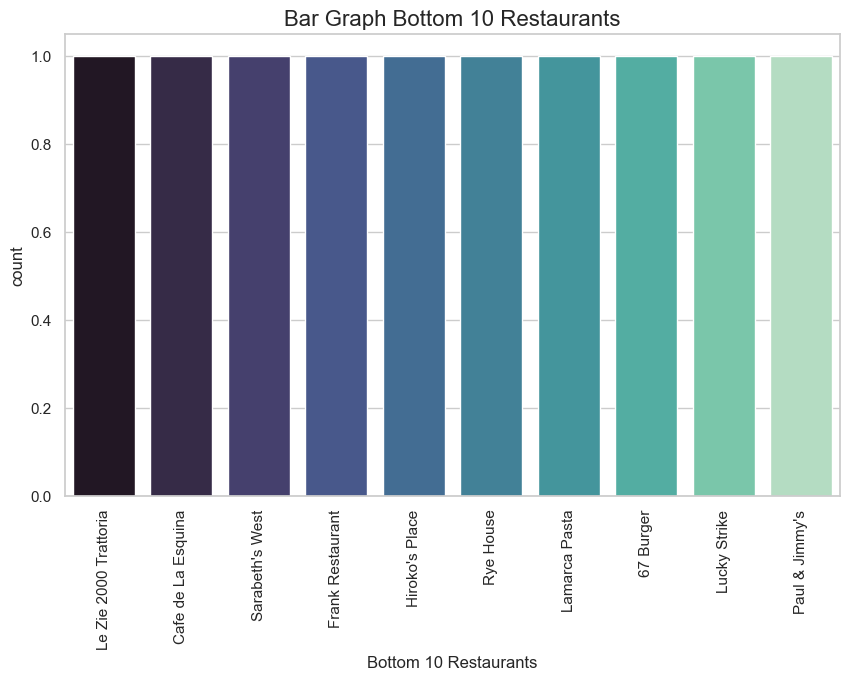

In [62]:
bottom_restaurants = df['restaurant_name'].value_counts().nsmallest(top_n).index
draw_countplot('restaurant_name', rot=90, name='Bottom 10 Restaurants', o=bottom_restaurants)

Graph seems to be too cluttered due to too many categories, lets try to discard few of them

In [66]:
x = 'restaurant_name'
df[x].value_counts().describe()

count    178.000000
mean      10.662921
std       24.047008
min        1.000000
25%        1.000000
50%        3.000000
75%        8.750000
max      219.000000
Name: restaurant_name, dtype: float64

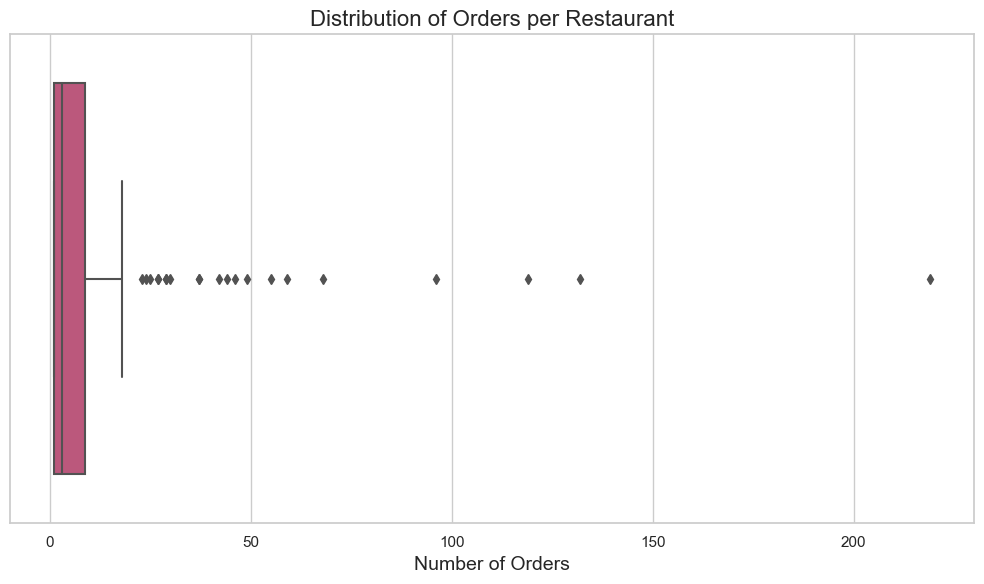

In [71]:
# Calculate the frequencies (order counts) for each restaurant
restaurant_order_counts = df['restaurant_name'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the boxplot for the frequencies
sns.boxplot(x=restaurant_order_counts, palette='plasma')

# Add a title and labels
plt.title('Distribution of Orders per Restaurant', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)

# Show the plot
plt.tight_layout()  # To avoid clipping of labels
plt.show()

In [72]:
def calc_iqr(ser):
    Q1 = ser.quantile(0.25)
    Q3 = ser.quantile(0.75)
    return (Q1, Q3)

In [73]:
calc_iqr(restaurant_order_counts)

(1.0, 8.75)

In [78]:
# Step 1: Calculate the frequency of each restaurant in the original dataframe
restaurant_counts = df['restaurant_name'].value_counts()

# Step 2: Filter restaurants whose order count is more than 10
restaurants_with_more_than_10_orders = restaurant_counts[restaurant_counts > 10].index

# Step 3: Filter the original dataframe based on the above condition
filtered_df = df[df['restaurant_name'].isin(restaurants_with_more_than_10_orders)]

filtered_df.shape

(1494, 9)

In [58]:
df.shape

(1898, 9)

In [59]:
1898 - 1494, (404 / 1898) * 100

(404, 21.285563751317177)

Observation: Only 400 (ie approx 20%) restaurants have more than 10 orders

In [60]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

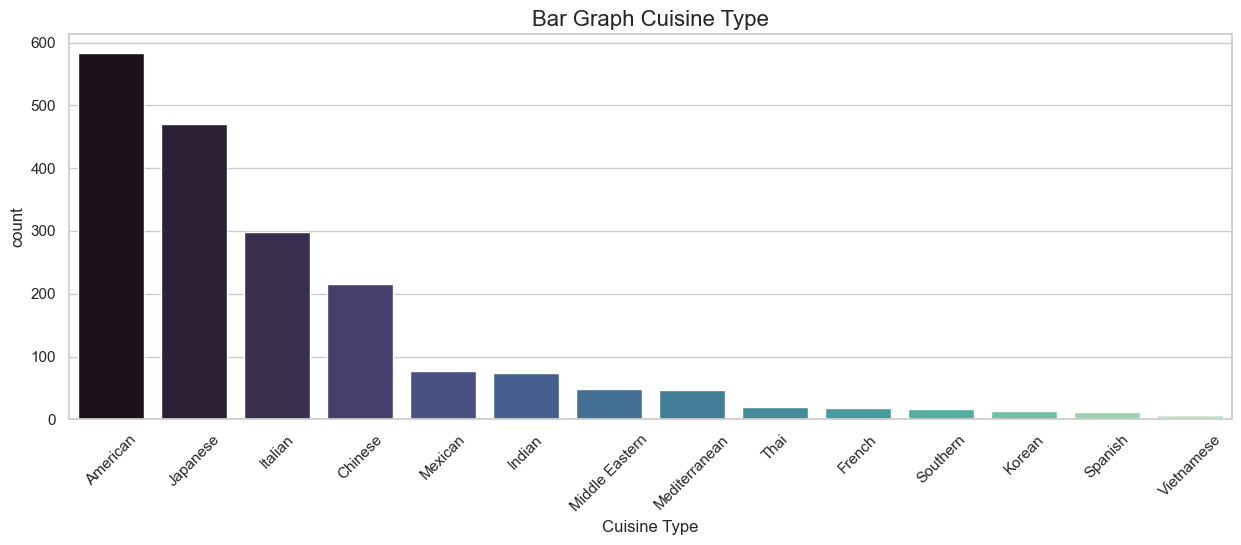

In [79]:
plt.figure(figsize=(15, 5))
draw_countplot('cuisine_type', rot=45)

In [100]:
# Observations:
# 1. The countplot for 'cuisine_type' shows the distribution of different types of cuisines in the dataset.
# 2. The most common cuisine types are American, Japanese, and Italian.
# 3. There are very fewer orders for cuisines like Korean, Spanish, and Vietnamese.
# 4. The distribution indicates a higher preference for certain cuisines among customers,
#  Hence restaurant should focus on such cuisines to attract more customers.

In [101]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

#### Cost of the Orders

In [81]:
x = 'cost_of_the_order'

In [104]:
q1, q3 = calc_iqr(df[x])
q3-q1

10.2175

Obsv:
Half of all the orders cost somewhere between 10 units more or less than typical usual price

In [86]:
# HistoGram
def draw_histplot(x, bins="auto"):
    label = snake_to_pascal(x)
    sns.histplot(data=df, x=x, bins=bins, kde=True, color='teal')
    plt.title(f'Histogram of {label}', fontsize=16)
    plt.xlabel(label, fontsize=12)
    plt.ylabel('frequeuncy', fontsize=12)
    plt.show()

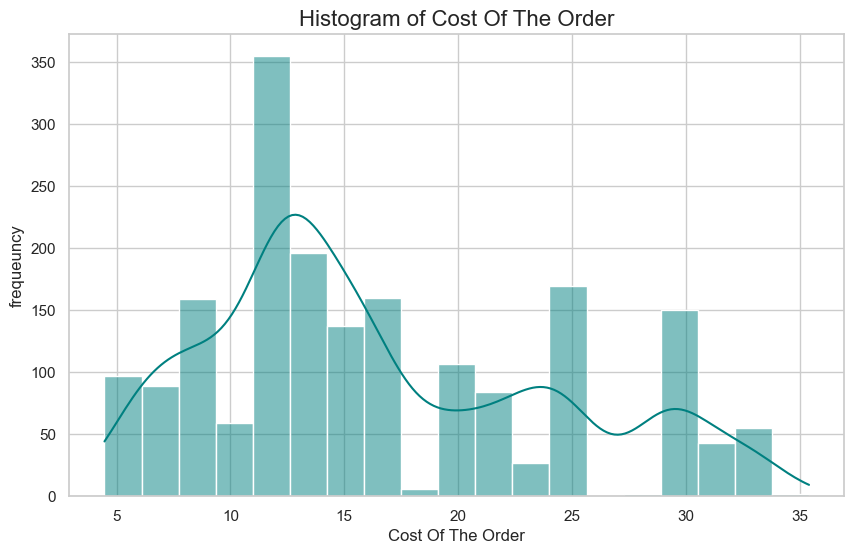

In [87]:
draw_histplot(x)

In [137]:
# Observations:
# 1. The histogram for 'Cost of the Order' shows the distribution of order costs in the dataset.
# 2. The distribution appears to be right-skewed, indicating that most orders are relatively inexpensive, with fewer high-cost orders.
# 3. The majority of orders cost between $10 and $20.
# 4. There are some outliers with significantly higher costs, which could be due to large or multiple orders.
# 5. The presence of a KDE (Kernel Density Estimate) line helps visualize the probability density of the order costs.

In [88]:
# Box Plot
def draw_boxplot(x):
    label = snake_to_pascal(x)
    sns.boxplot(data=df, x=x, color='salmon')
    plt.title(f'Boxplot of {label}', fontsize=16)
    plt.xlabel(label, fontsize=12)
    plt.show()

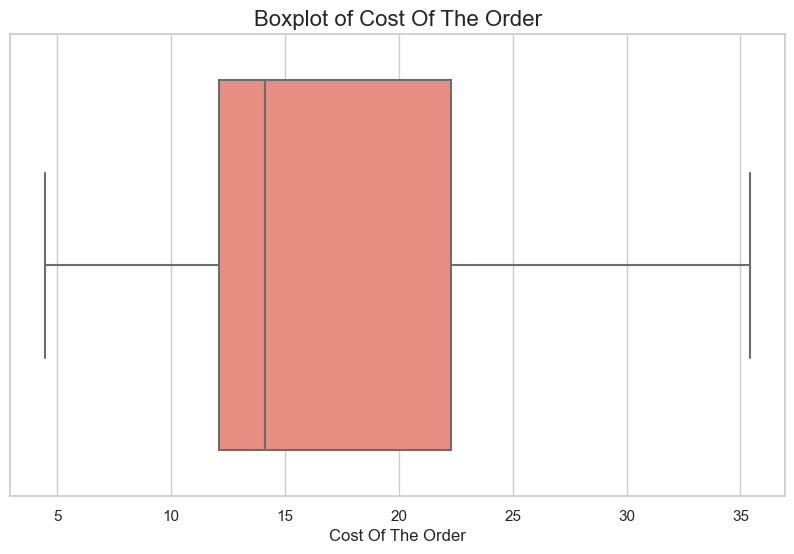

In [89]:
draw_boxplot(x)

(Maybe this can be kept with calc_iqr() analysis)

In [140]:
# Observations:
# 1. The boxplot for 'Cost of the Order' shows the distribution of order costs in the dataset.
# 2. The median cost of the orders is around 15 units.
# 3. The interquartile range (IQR) is approximately 10 units, indicating that the middle 50% of the orders cost between 12.08 and 22.30 units.
# 4. There are several outliers with higher costs, which could be due to large or multiple orders.
# 5. The presence of outliers suggests that while most orders are within a certain range, there are some orders that are significantly more expensive.

Obsv.

The boxplot for 'Cost of the Order' reveals that the average order costs about 15 units, with most orders falling between 12.08 and 22.30 units. This means that half of the orders are within this price range. However, there are a few orders that are much more expensive, likely due to larger or multiple items being ordered. This shows that while most people are placing affordable orders, some orders can be significantly higher in cost.

In [97]:
#Descriptive Statistics
print(df['cost_of_the_order'].describe(), end='\n\n')

# deeper insights into distribution shape
print(f"skewness: {df['cost_of_the_order'].skew()}")
print(f"kurtosis: {df['cost_of_the_order'].kurt()}")

Descriptive Statistics 
 count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

skewness: 0.6217469995871637
kurtosis: -0.6078508734318953


In [141]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [98]:
x = 'day_of_the_week'

In [99]:
# Descriptive Statistics
day_counts = df['day_of_the_week'].value_counts()
day_counts_pct = df['day_of_the_week'].value_counts(normalize=True) * 100

print('Order Counts by Day of the Week:', day_counts, sep='\n')
print('\nPercentage of Orders by Day of the Week:', day_counts_pct, sep='\n')

Order Counts by Day of the Week:
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

Percentage of Orders by Day of the Week:
Weekend    71.18019
Weekday    28.81981
Name: day_of_the_week, dtype: float64


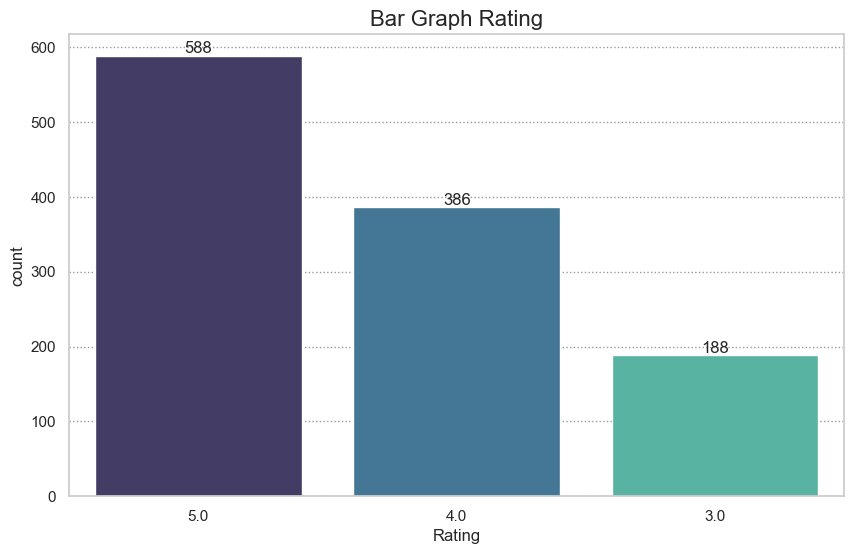

In [144]:
draw_countplot(x)

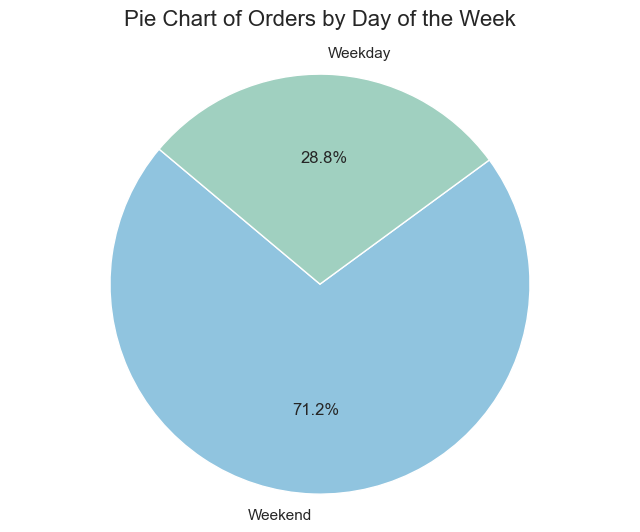

In [114]:
# draw pie chart for day of the week
plt.figure(figsize=(8, 6))
plt.title('Pie Chart of Orders by Day of the Week', fontsize=16, pad=20)
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140, colors=['#90c4df', '#a0d0c0'])
plt.axis('equal')
plt.show()

In [150]:
# Observations:
# 1. The pie chart for 'Orders by Day of the Week' shows the distribution of orders between weekdays and weekends.
# 2. The majority of orders are placed on weekends, accounting for approximately 71.2% of the total orders.
# 3. Weekday orders make up the remaining 28.8% of the total orders.
# 4. This indicates a higher demand for food orders during weekends compared to weekdays.
# 5. Restaurants may consider increasing their staff and resources during weekends to handle the higher volume of orders.

In [151]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [132]:
pie_colors_domain = ['#90c4df', '#a0d0c0', '#FF9999FF', '#8F9DDDFF', '#99D3FFFF', '#D370DEFF', '#FFC099FF', '#FF99D8FF', '#8DE5BAFF',  '#FFD699FF', '#A199FFFF']
def draw_pieplot(x):
    label = snake_to_pascal(x)
    counts = df[x].value_counts()
    plt.figure(figsize=(8, 6))
    c = pie_colors_domain[:len(counts)]
    plt.title(f'Pie Chart of {label}', fontsize=16, pad=20)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=c)
    plt.axis('equal')
    plt.show()

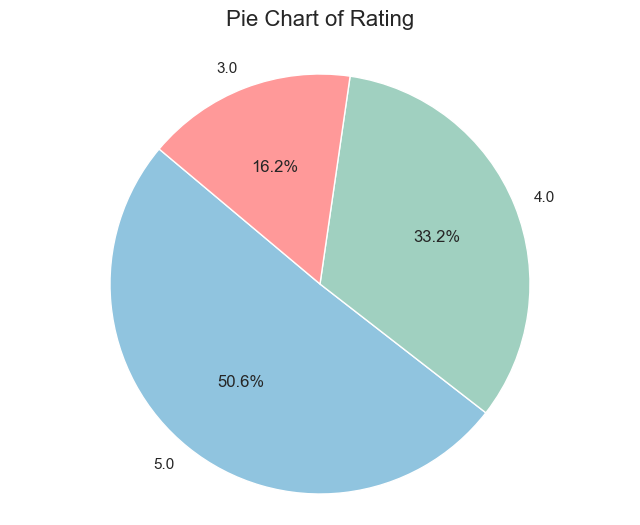

In [133]:
x = 'rating'
draw_pieplot(x)

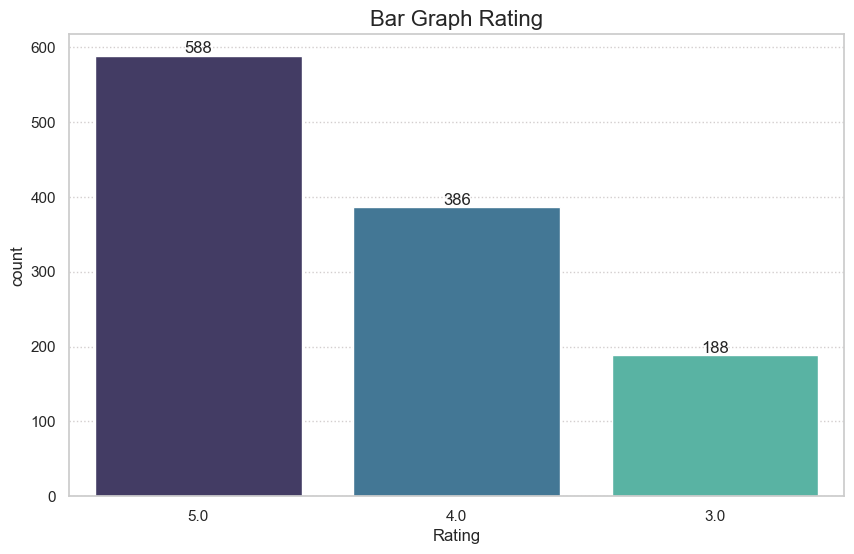

In [159]:
sns.set_style('whitegrid', {"grid.color": "#D3CECEFF", "grid.linestyle": ":"})
draw_countplot(x)

In [161]:
df[x].value_counts()

5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

In [135]:
# Note; here null is same as "Not given" as we have already converted "Not given" to NaN
ratings_not_given = df[x].isnull().sum()
ratings_not_given

736

In [164]:
# Observations:
# 1. The pie chart for 'Rating' shows the distribution of ratings given by customers.
# 2. A significant portion of the ratings are 'Not given', indicating that many customers did not provide a rating.
# 3. Among the given ratings, the most common rating is 5, followed by 4 and 3.
# 4. The distribution suggests that customers who do rate their orders tend to give higher ratings.
# 5. The presence of many 'Not given' ratings could indicate a need for encouraging customers to provide feedback.

#The pie chart for 'Rating' shows that many customers didn't provide a rating, as indicated by the significant portion marked as 'Not given'. Among the ratings that were given, the most common is a 5, followed by 4 and 3. This suggests that customers who do leave ratings generally tend to give high scores. The large number of 'Not given' ratings highlights the potential opportunity for the company to encourage more customers to share their feedback.

In [165]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [168]:
# descriptive statistics for 'food_preparation_time' column
food_preparation_time_summary = df[x].describe()
food_preparation_time_summary

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [167]:
df[x].nunique()

16

This indicates preparation times could be discrete

In [171]:
# Just for understanding (Dont include in actual nb)
# frequency of each food preparation time
food_preparation_time_counts = df[x].value_counts()
food_preparation_time_counts_pct = df[x].value_counts(normalize=True) * 100

print('Food Preparation Time Counts:', food_preparation_time_counts, sep='\n')

Food Preparation Time Counts:
21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
31    116
26    115
25    113
34    113
32    113
29    109
Name: food_preparation_time, dtype: int64


In [172]:
print('\nPercentage of Food Preparation Time:', food_preparation_time_counts_pct, sep='\n')


Percentage of Food Preparation Time:
21    7.112750
23    6.480506
27    6.480506
22    6.480506
28    6.375132
24    6.375132
20    6.269758
30    6.269758
33    6.217071
35    6.164384
31    6.111697
26    6.059009
25    5.953635
34    5.953635
32    5.953635
29    5.742887
Name: food_preparation_time, dtype: float64


In [ ]:
# Display the percentage distribution of food preparation times
# Just for understanding (Dont include in actual nb)
print(food_preparation_time_counts_pct)

# Consider this obsv.
# Observations:
# 1. The food preparation times are fairly evenly distributed across the different time slots.
# 2. The most common preparation time is 21 minutes, accounting for approximately 7.11% of the orders.
# 5. The distribution suggests that most orders are prepared within a range of 20 to 35 minutes, with no single time slot dominating the distribution.
# 6. This consistency in preparation times indicates that restaurants have a standardized process for preparing orders, leading to predictable and reliable preparation times for customers.

Observatio Note 

The 'Food Preparation Time' column contains only 16 unique values, meaning that the time it takes for restaurants to prepare orders is fairly consistent. This could suggest that most restaurants have similar preparation times for their orders, or they may follow a standard process for preparing meals. It also indicates that there aren't many variations in how long it takes to prepare food across different orders.

The distribution of 'Food Preparation Time' shows that most orders are prepared within a time frame of 20 to 35 minutes.

Obsv.
The 'Food Preparation Time' column contains only 16 unique values, meaning that the time it takes for restaurants to prepare orders is fairly consistent. This could suggest that most restaurants have similar preparation times for their orders, or they may follow a standard process for preparing meals. It also indicates that there aren't many variations in how long it takes to prepare food across different orders.

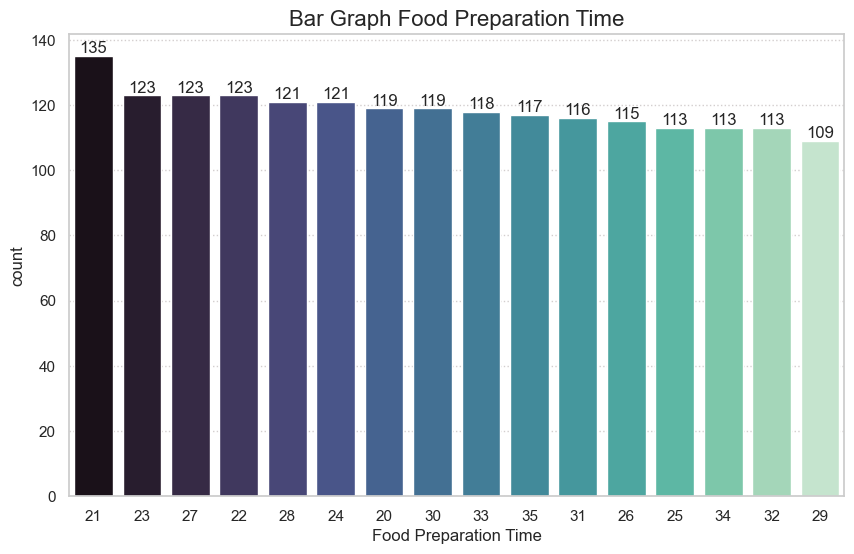

In [173]:
draw_countplot(x)

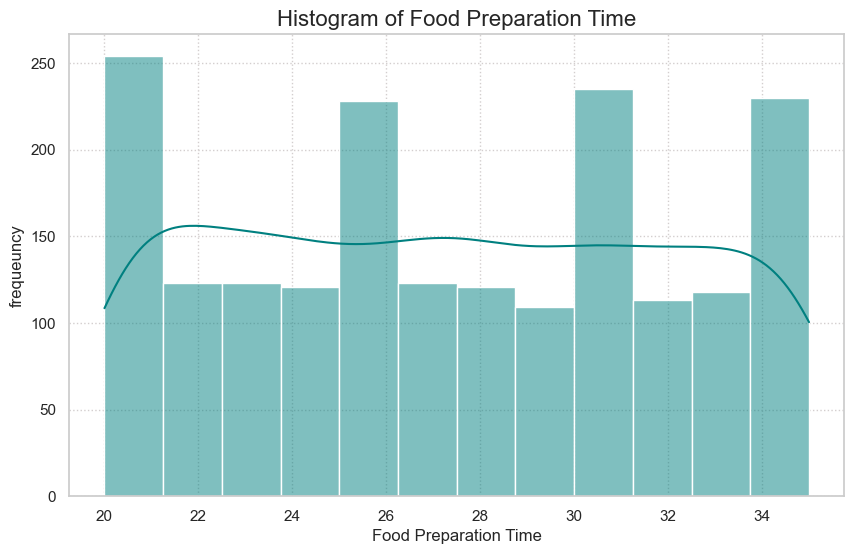

In [187]:
draw_histplot('food_preparation_time')

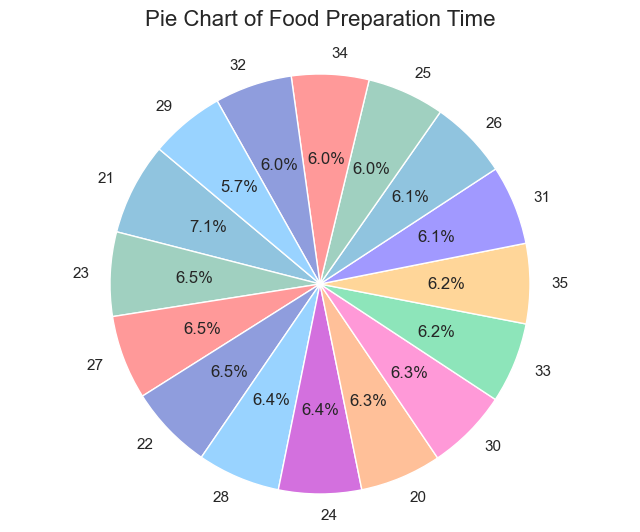

In [174]:
draw_pieplot(x)

Time is in Mins

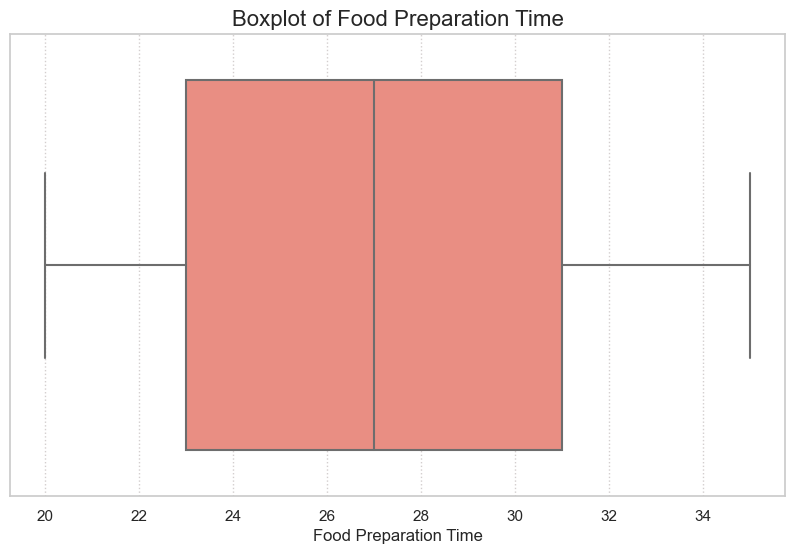

In [175]:
draw_boxplot(x)

In [176]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [180]:
x = 'delivery_time'
df[x].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

In [179]:
# frequency of each delivery time
delivery_time_counts = df[x].value_counts()
delivery_time_counts.shape

(19,)

In [ ]:
# Observations:
# 1. The 'delivery_time' column contains 1898 entries, indicating that there are no missing values for this feature.
# 2. The average delivery time is approximately 24.16 minutes.
# 3. The standard deviation is around 4.97 minutes, indicating some variability in delivery times.
# 4. The minimum delivery time is 15 minutes.
# 5. The 25th percentile (Q1) is 20 minutes, meaning 25% of the orders have a delivery time of 20 minutes or less.
# 6. The median (50th percentile) delivery time is 25 minutes.
# 7. The 75th percentile (Q3) is 28 minutes, meaning 25% of the orders have a delivery time of 28 minutes or more.
# 8. The maximum delivery time is 33 minutes.

# Interpretation:
# 25% of the deliveries are very fast, taking only 20 minutes or less,
# 50% of the deliveries take 28 minutes or less

# *** IMPORTANT ***
# On average, deliveries take about 24 minutes, with most orders falling between 20 and 28 minutes.
# While the fastest deliveries are completed in 15 minutes, some take up to 33 minutes.
# The slight variability in delivery time (around 5 minutes) suggests a consistent but slightly flexible pace across delivery services.

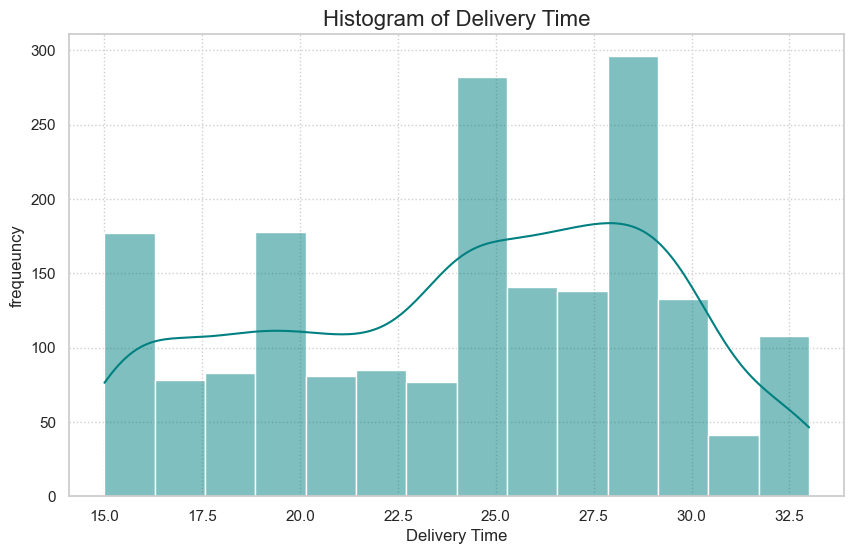

In [181]:
draw_histplot(x)

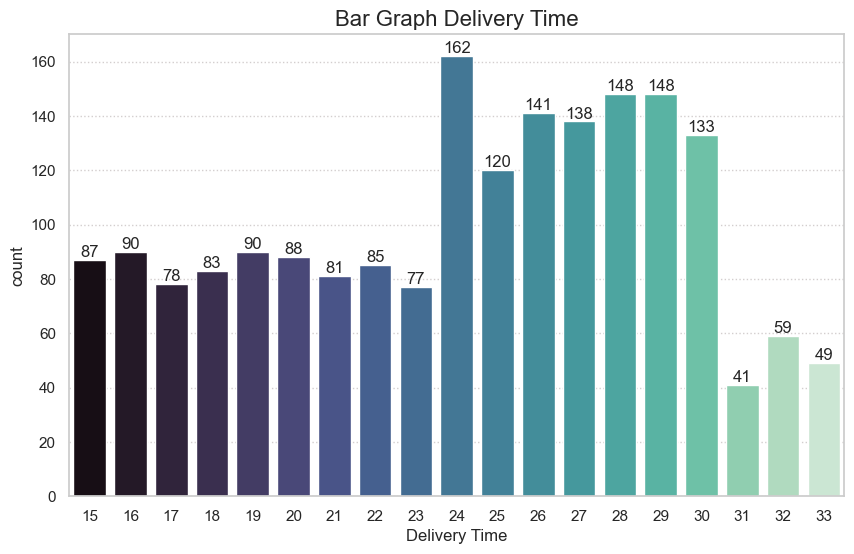

In [ ]:
# As here time is more important, we are not showing bars in sorted fashion
draw_countplot(x, sort=False)

In [189]:
# Q7.
# write code to find top 5 restauranrs in terms of orderes recieved
k = 5
# NOTE: The resulting object will be in descending order so that the first element is the most frequently-occurring element.
top_restaurants = df['restaurant_name'].value_counts().head(5)
top_restaurants

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [194]:
# Q8  Popuplar Cuisine on Weekend
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
popular_cuisine_order_count = weekend_orders['cuisine_type'].value_counts().head(1)
popular_cuisine_order_count


American    415
Name: cuisine_type, dtype: int64

In [196]:
total_orders = df.shape[0]
popular_cuisine_pct = (popular_cuisine_order_count / total_orders) * 100
popular_cuisine_pct

American    21.865121
Name: cuisine_type, dtype: float64

In [ ]:
# Observations:
# The most popular cuisine type on weekends is American, with a total of 415 orders.
# This indicates a strong preference for American cuisine among customers during weekends.
# Restaurants offering American cuisine may experience higher demand on weekends and should be prepared to handle the increased volume of orders.

In [191]:
# Q9. % order more than 20
# Create a mask for orders with cost greater than 20
mask_cost_above_20 = df['cost_of_the_order'] > 20
percent_of_order_above_20 = mask_cost_above_20.mean() * 100
percent_of_order_above_20

29.24130663856691

In [ ]:
# Observation:
# Approximately 29.24% of the orders have a cost greater than 20 units.
# This indicates that nearly one-third of the orders are relatively high-cost, suggesting that a significant portion of customers are willing to spend more on their food orders.

In [200]:
#Q10 find rows with avg rating greater than 4 and total rating count more than 50
df['delivery_time'].mean()


24.161749209694417

In [211]:
#Q11.
# find the top 5 customers with maximum orders placed
top_customers = df['customer_id'].value_counts().head(3)
top_customers_df = top_customers.reset_index()
top_customers_df.columns = ['customer_id', 'order_count']
top_customers_df

,customer_id,order_count
0,52832,13
1,47440,10
2,83287,9


#### BiVariate Analysis

#### Demand Analysis

Restaurant name and cuisien type

In [213]:
def plot_countplot_b(x, y, data, name=None):
    label = name if name else snake_to_pascal(x)
    ax = sns.countplot(data=data, x=x, hue=y, palette='mako')
    ax.bar_label(ax.containers[0])
    plt.title(f'Bar Graph of {label} by {y}', fontsize=16)
    plt.xlabel(label, fontsize=12)
    plt.ylabel('count', fontsize=12)
    plt.show()

In [215]:
x = 'restaurant_name'
y = 'cuisine_type'
df[x].nunique(), df[y].nunique()

(178, 14)

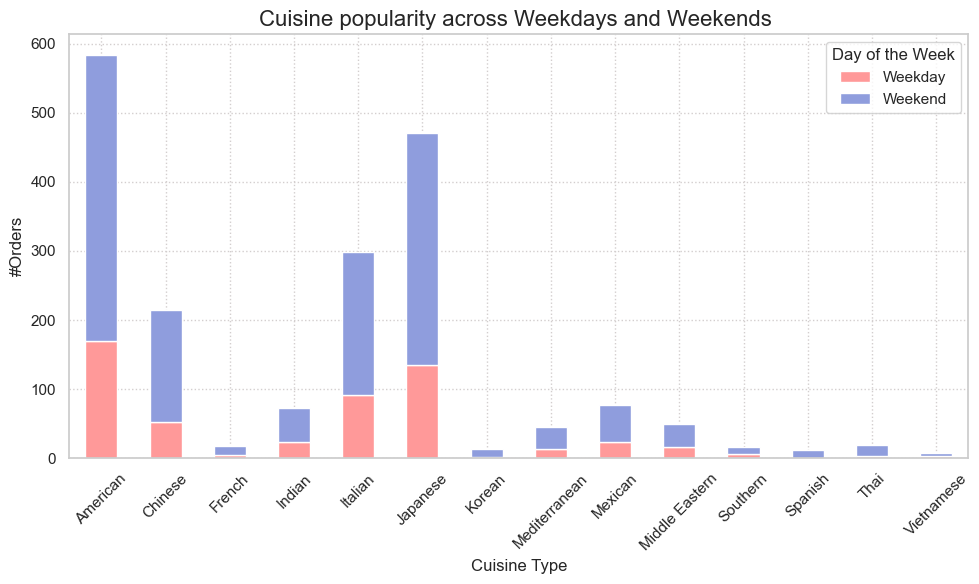

In [223]:
# stacked bar graph
x = 'cuisine_type'
y = 'day_of_the_week'
# create a cross tab to aggregate data
cuisine_day_data = pd.crosstab(df[x], df[y])

# plot stacjed bar graph
#plt.figure(figsize=(12, 6))
cuisine_day_data.plot(kind='bar', stacked=True, color=['#FF9999FF', '#8F9DDDFF'])

# add titles and labels
plt.title('Cuisine popularity across Weekdays and Weekends ', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('#Orders', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Day of the Week', loc='upper right')
plt.tight_layout()

# show the plot
%matplotlib inline
plt.show()

In [ ]:
# Observations:

#1. The data indicates a general trend of higher demand for various cuisines during weekends, suggesting that customers are more likely to order food during weekends.
#2. Restaurants may consider increasing their inventory and staffing on weekends to accommodate the higher volume of orders.

In [224]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [218]:
# get chinese cuisine order count on weekdays
def get_cuisine_day_order_count(cuisine, day):
    return df[(df['cuisine_type'] == cuisine) & (df['day_of_the_week'] == day)].shape[0]

chinese_weekdays = get_cuisine_day_order_count('Chinese', 'Weekday')
chinese_weekends = get_cuisine_day_order_count('Chinese', 'Weekend')
chinese_weekdays, chinese_weekends

(52, 163)

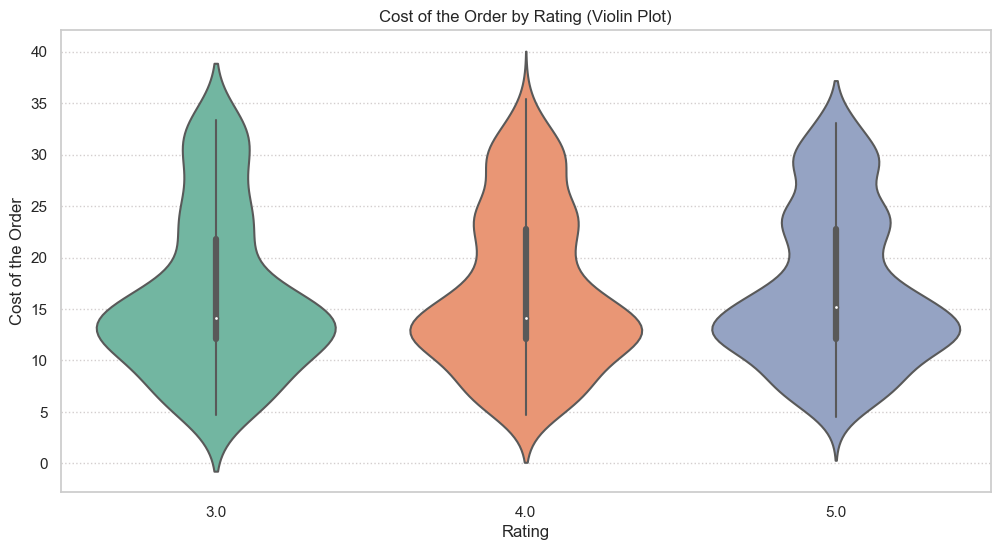

In [227]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='rating', y='cost_of_the_order', palette='Set2')
plt.title('Cost of the Order by Rating (Violin Plot)')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.show()

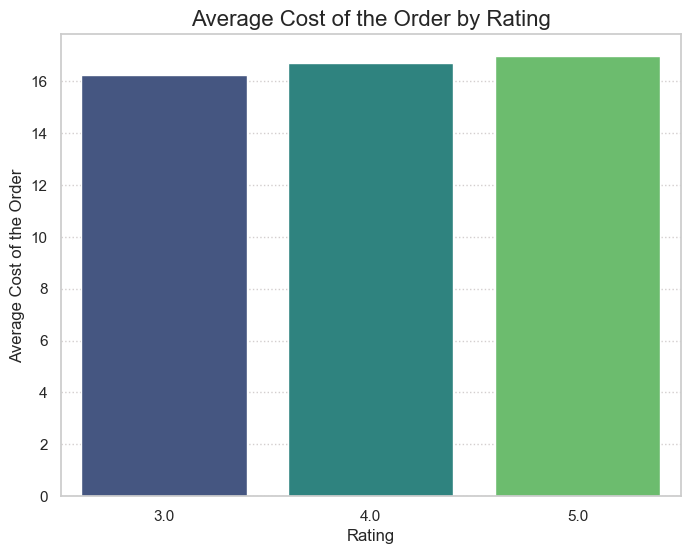

In [228]:
# calculate average cost for each rating
avg_cost_by_rating = df.groupby('rating')['cost_of_the_order'].mean().reset_index()

# create a bar plot to show the average cost for each rating
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_cost_by_rating, x='rating', y='cost_of_the_order', palette='viridis')

# Add title and labels
plt.title('Average Cost of the Order by Rating', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Average Cost of the Order', fontsize=12)

# Show the plot
plt.show()

In [231]:
avg_cost_by_rating = original_df.groupby('rating')['cost_of_the_order'].mean().reset_index()
avg_cost_by_rating

,rating,cost_of_the_order
0,3,16.223351
1,4,16.710337
2,5,16.965697
3,Not given,16.085340


This suggests that cost of an order does not vary significantly based on the rating given by the customer. In other words, whether the customer gives a high or low rating, the average amount spent on orders remains relatively consistent. This could further imply that pricing of the orders is independent of customer satisfaction, or there may be a broad range of pricing within each rating group

The average cost appears to be almost identical across all ratings. Additionally, event when ratings were not provided, the average cost remains consistent. This indicates cost is independent of customer feedback.

Recommendations : 

- Focus on improving non-cost-related aspects like food presentation, freshness, delivery accuracy, and speed.
- Encourage customers to leave feedback on what they enjoyed or disliked about their experience to identify areas for improvement.
- Consider adding value to the customer experience through small gestures like complimentary items or personalized notes, which could help boost ratings without impacting average costs.

In [232]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [233]:
x = 'day_of_the_week'
y = 'delivery_time'
df[x].nunique(), df[y].nunique()

(2, 19)

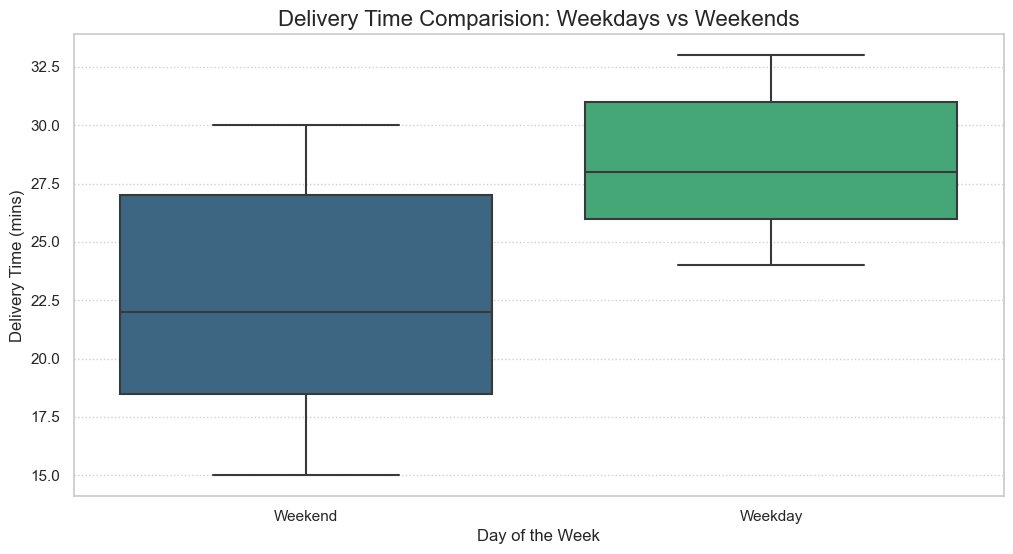

In [234]:
# box plot between day of the week and delivery time
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=x, y=y, palette='viridis')

# add title and labels
plt.title('Delivery Time Comparision: Weekdays vs Weekends', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Delivery Time (mins)', fontsize=12)

# show the plot
plt.show()

In [235]:
# calculate median time for each day of the week
median_delivery_time = df.groupby('day_of_the_week')['delivery_time'].median().reset_index()
median_delivery_time

,day_of_the_week,delivery_time
0,Weekday,28.0
1,Weekend,22.0


Observation:
Delivery times on weekdays tend to be higher and more spread out compared to weekends,
where they are generally faster and more consistent.
This could suggest that weekend orders may be handled more efficiently or have less traffic,
while weekdays could experience more delays or variability, possibly due to increased order volume or delivery congestion.

In [239]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [240]:
x = 'rating'
y = 'delivery_time'
df[x].nunique(), df[y].nunique()

(3, 19)

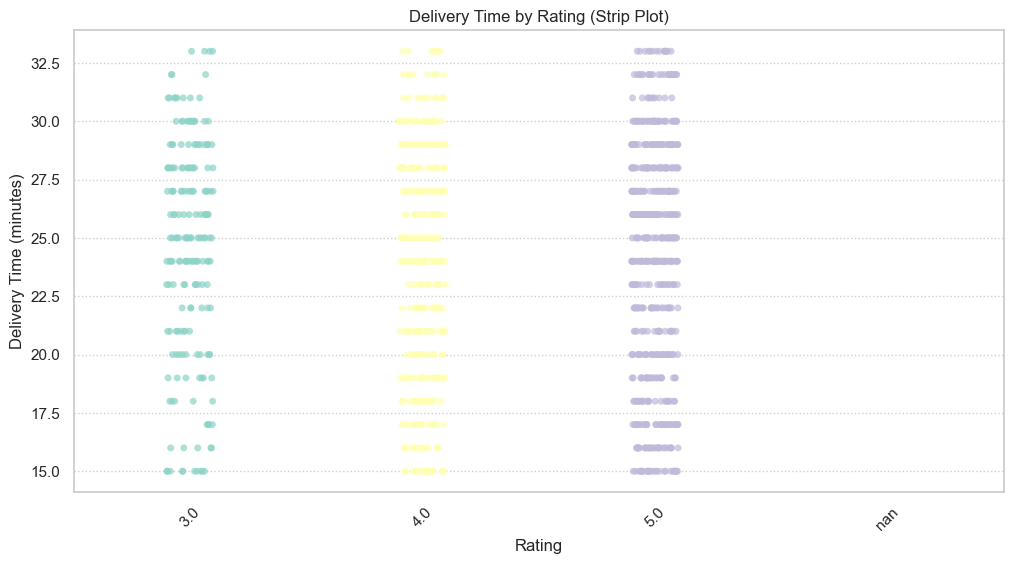

In [ ]:
plt.figure(figsize=(12, 6))

sns.stripplot(data=df, x='rating', y='delivery_time', palette='Set3', jitter=True, alpha=0.7)
plt.title('Delivery Time by Rating (Strip Plot)')
plt.xlabel('Rating')
plt.ylabel('Delivery Time (minutes)')
plt.show()

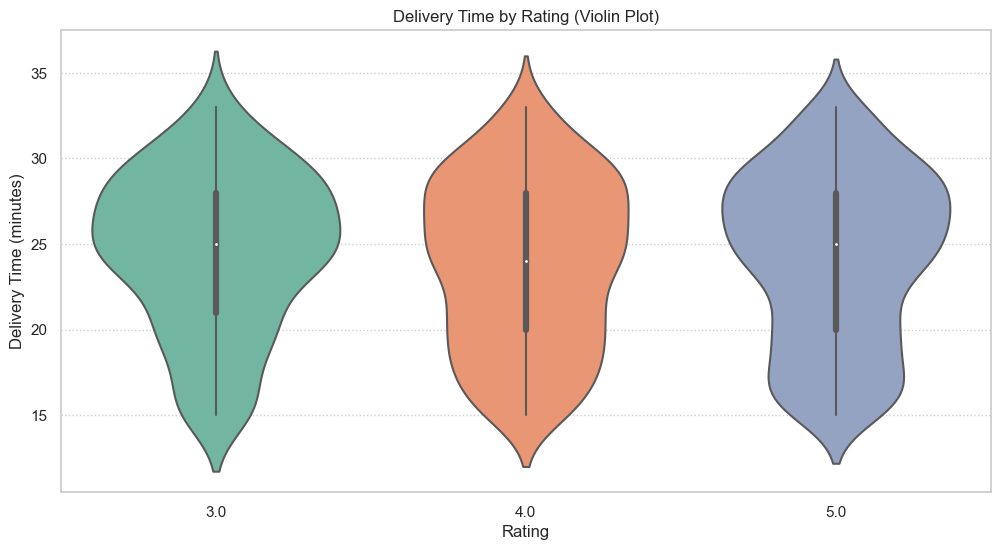

In [245]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='rating', y='delivery_time', palette='Set2')
plt.title('Delivery Time by Rating (Violin Plot)')
plt.xlabel('Rating')
plt.ylabel('Delivery Time (minutes)')
plt.show()

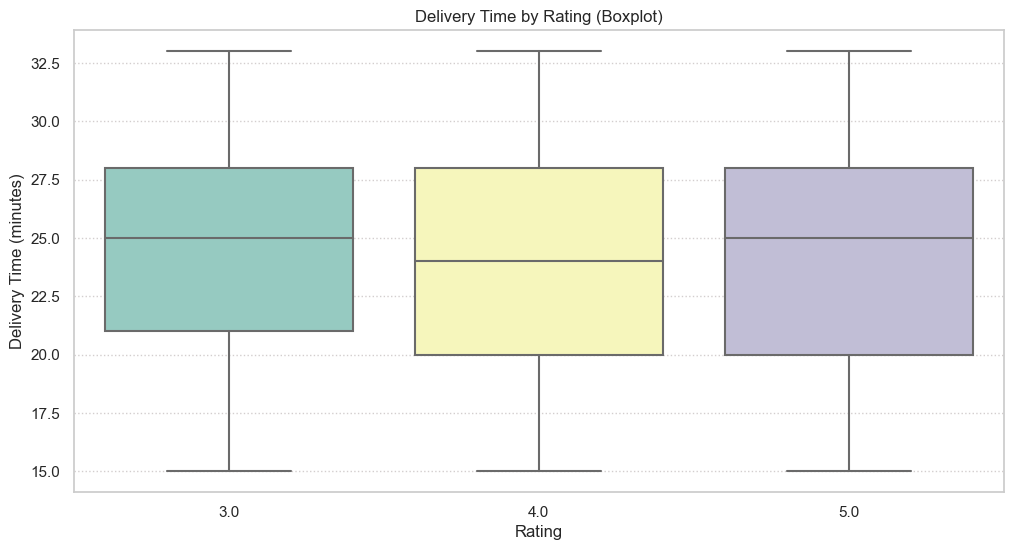

In [246]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='rating', y='delivery_time', palette='Set3')
plt.title('Delivery Time by Rating (Boxplot)')
plt.xlabel('Rating')
plt.ylabel('Delivery Time (minutes)')
plt.show()


In [247]:
avg_delivery_time_by_rating = df.groupby('rating')['delivery_time'].mean().reset_index()
avg_delivery_time_by_rating

,rating,delivery_time
0,3.0,24.558511
1,4.0,23.867876
2,5.0,24.212585


Observation:
The average delivery time by rating shows that the delivery times are relatively consistent across different ratings.
This suggests that the delivery time does not significantly impact the rating given by customers. Whether the delivery time is slightly longer or shorter, customers tend to give similar ratings. This could imply that other factors, such as food quality, order accuracy, and customer service, play a more crucial role in determining customer satisfaction and ratings.

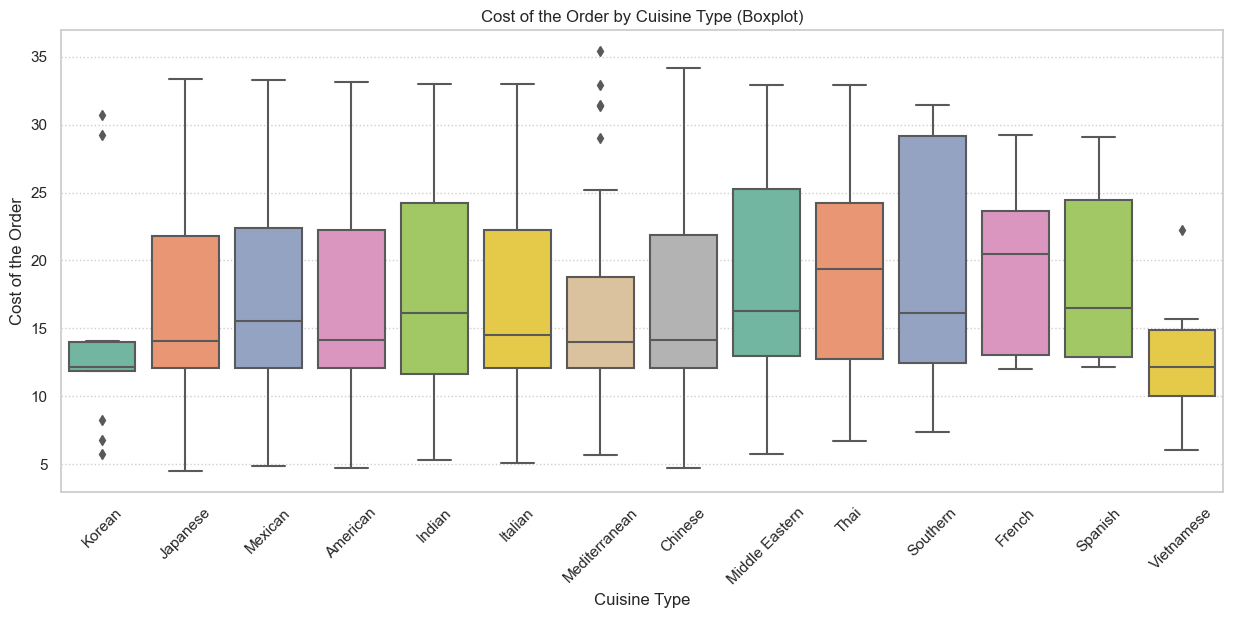

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', palette='Set2')
plt.title('Cost of the Order by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=45)
plt.show()

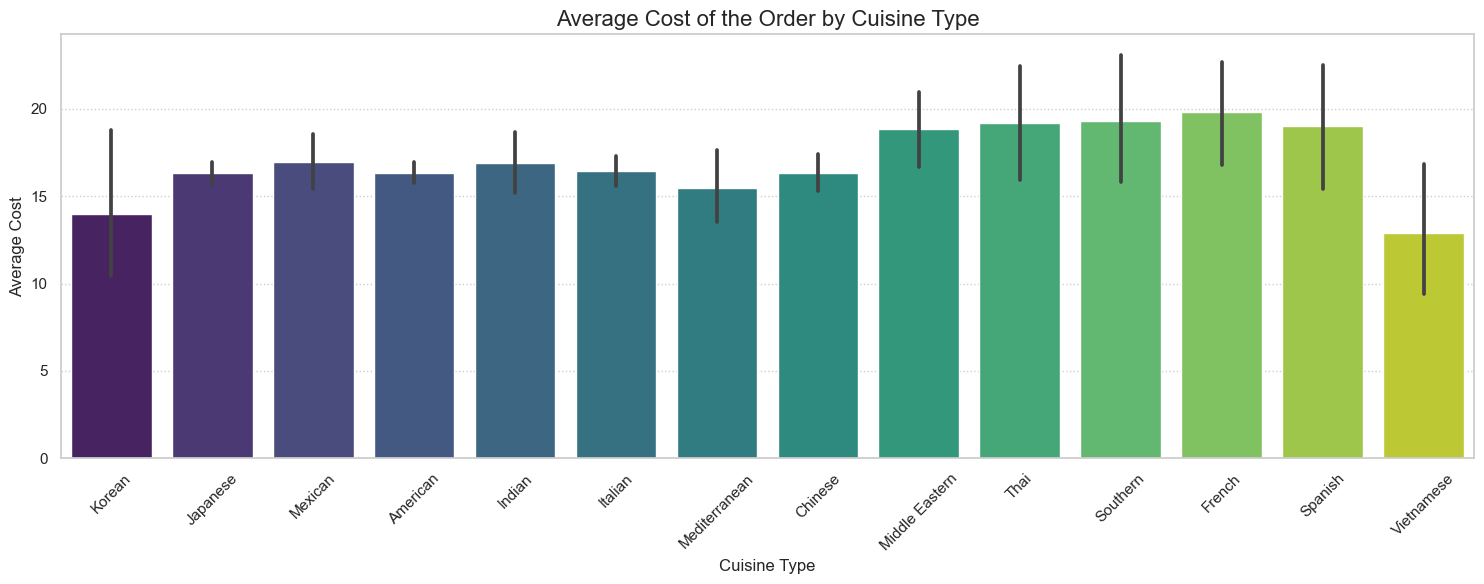

In [251]:
# create bar plot
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='cuisine_type', y='cost_of_the_order', palette='viridis')

# title and labels
plt.title('Average Cost of the Order by Cuisine Type', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Average Cost', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# show the plot
plt.tight_layout()
plt.show()

In [252]:
avg_cost_by_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].mean().reset_index()
avg_cost_by_cuisine

,cuisine_type,cost_of_the_order
0,American,16.319829
1,Chinese,16.305209
2,French,19.793889
3,Indian,16.919726
4,Italian,16.418691
5,Japanese,16.304532
6,Korean,14.001538
7,Mediterranean,15.474783
8,Mexican,16.933117
9,Middle Eastern,18.820612


Observations:
1. The average cost of orders varies across different cuisine types.
2. French cuisine has the highest average cost at approximately 19.79 units, followed by Spanish and Southern cuisines.
3. Vietnamese cuisine has the lowest average cost at approximately 12.88 units.
4. Most cuisines have an average cost between 14 and 19 units.
5. The variation in average costs suggests that certain cuisines may be priced higher due to factors such as ingredient costs, preparation complexity, or restaurant pricing strategies.

In [178]:
# restaruant with rating count more than 50 & average rating greater than 4
rating_counts = df['restaurant_name'].value_counts()
rating_avg = df.groupby('restaurant_name').apply
rating_avg[rating_counts > 50].loc[lambda x: x > 4]

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Parm                         4.128205
RedFarm Broadway             4.243902
RedFarm Hudson               4.176471
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64

In [179]:
rating_counts

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [184]:
rating_avg

pandas.core.series.Series

In [195]:
grouped = df.groupby('restaurant_name').apply(df)

TypeError: unhashable type: 'DataFrame'

In [197]:
grouped = df.groupby('restaurant_name').agg(total_ratings=('rating', 'count'), avg_ratings=('rating', 'mean')).reset_index()
grouped

,restaurant_name,total_ratings,avg_ratings
0,'wichcraft,1,5.000000
1,12 Chairs,2,4.500000
2,5 Napkin Burger,2,4.000000
3,67 Burger,1,5.000000
4,Alidoro,0,NaN
...,...,...,...
173,Zero Otto Nove,1,4.000000
174,brgr,1,3.000000
175,da Umberto,1,5.000000
176,ilili Restaurant,13,4.153846
